# Capstone Week 4
---

# Index
- [Capstone Objectives](#Capstone-Objectives)
- [Read in Data](#Read-in-Data)
    - [Merge 2018 and 2019](#Merge-2018-and-2019)
    - [Make advisor dictionary mapper](#Make-advisor-dictionary-mapper)
- [Data Cleaning](#Data-Cleaning)
    - [Train-Test-Split](#Train-Test-Split)
    - [Custom Cleaning Functions](#Custom-Cleaning-Functions)
    - [Create Cleaning Pipeline](#Create-Cleaning-Pipeline)
- [Model building](#Model-building)
- [Make predictions](#Make-predictions)
- [Feature Engineering](#Feature-Engineering)
    - [Variable Inflation Factor (VIF)](#Variable-Inflation-Factor-(VIF))
- [Residuals](#Residuals)
- [Classification](#Classification)
- [Model Interpretation](#Model-Interpretation)

# Capstone Objectives
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018
- Estimate the probability of adding a new fund in 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50)

[Back to Top](#Index)
# Read in Data

In [2]:
df18 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions19")

## Merge 2018 and 2019

In [3]:
df = pd.merge(
    df18, 
    df19, 
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [4]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date_2018,sales_12M_2019,new_Fund_added_12M_2019,refresh_date_2019
0,0047433,21.0,38.0,NaN,1.0,5.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,8.0,1.0,237480.11,250.0,19682.0,-1496.745,-102496.165,NaN,-47342.32,284737.93,84.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122866.04,114614.07,0.0,0.0,2018-12-31,18633.105,NaN,2019-12-31
1,4461312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,19629.00,NaN,NaN,NaN,NaN,NaN,0.00,19629.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19629.00,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
2,4491079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1758.70,NaN,NaN,NaN,NaN,NaN,0.00,1758.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1758.70,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
3,0107408,20.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,57943.00,5459.0,52484.0,NaN,NaN,1.0,0.00,0.00,57943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57943.00,0.00,0.0,0.0,2018-12-31,93212.000,1.0,2019-12-31
4,85101140503769936458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8573.59,NaN,NaN,NaN,NaN,NaN,-8573.59,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8573.59,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31


## Make advisor dictionary mapper

In [5]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [6]:
adviser_lookup[123]

'85201142414218755394'

[Back to Top](#Index)
# Data Cleaning

In [7]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID', 
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

In [8]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y_reg = df['sales_12M_2019']
y_cl = df['new_Fund_added_12M_2019']

## Train-Test-Split

In [25]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=24
)
y_train_cl, y_test_cl = y_cl[y_train_reg.index], y_cl[y_test_reg.index]

## Custom Cleaning Functions

In [26]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()


def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    elif isinstance(df, type(pd.DataFrame())):
        num_df = df.select_dtypes(include=['number']).fillna(0)
        non_num_df = df.select_dtypes(exclude=['number'])
        return pd.concat([num_df, non_num_df], axis=1)
    else:
        return np.nan_to_num(df)

def negative_to_zero(series):
    '''fill negative values to zero'''
    if isinstance(series, type(pd.Series(dtype='float64'))):
        return series.apply(lambda x: max(0, x))
    else:
        return series

[Back to Top](#Index)
## Create Cleaning Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

In [28]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)
negative_to_zero_trans = FunctionTransformer(negative_to_zero)

Make pipeline for target variable

In [37]:
targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('negative_to_zero', negative_to_zero_trans)
#     ('num_imp', SimpleImputer(strategy='median'))
])

In [38]:
targ_pipe.fit(y_train_reg.to_frame())

Pipeline(steps=[('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x12abf53a0>)),
                ('negative_to_zero',
                 FunctionTransformer(func=<function negative_to_zero at 0x12abf50d0>))])

In [36]:
pd.Series(targ_pipe.transform(y_train_reg.to_frame()).reshape(1,-1).flatten(), index=y_train_reg.index)

4081       311.240
184      15275.180
186        494.180
230          0.000
6327         0.000
           ...    
6500         0.000
5249         0.000
3473    125271.540
8535       525.755
899          0.000
Length: 7503, dtype: float64

In [39]:
y_train_reg = targ_pipe.fit_transform(y_train_reg) # fit and transform TRAINING
y_train_cl = targ_pipe.fit_transform(y_train_cl)

In [40]:
y_test_reg = targ_pipe.transform(y_test_reg) # transform only TESTING
y_test_cl = targ_pipe.transform(y_test_cl) # transform only TESTING

Make pipeline for features

In [41]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

In [42]:
train_array = feat_pipe.fit(X_train, y_train_reg).transform(X_train)
train_array[:2]

array([[-0.13132686, -0.10041755, -0.21064088, -0.19865712, -0.15343695,
        -0.62678711, -0.43000009, -0.44180383,  0.20146207, -0.86803317,
        -0.53463025, -0.5620389 , -0.37248773,  0.06554336, -0.0889493 ,
        -0.08324658, -0.15460596,  0.09041682,  0.15624596,  0.43684362,
        -0.02649335, -0.07060094, -0.05980054, -0.01245516, -0.02380215,
        -0.04182124, -0.03765524, -0.04000228, -0.07036559, -0.03062799,
        -0.09354653, -0.01848494, -0.0563512 , -0.05793289, -0.01655909,
        -0.07003327],
       [ 0.06459803, -0.06813442, -0.21064088, -0.08744056,  1.9542844 ,
         1.39940146, -0.43000009,  0.29680003,  1.18812652,  1.03436288,
        -0.53463025,  0.77753476,  3.17786794,  1.01858956, -0.12450774,
        -0.08221872, -0.13964123,  0.09041682,  0.07167552,  3.84838427,
         0.05015345, -0.16682196, -0.05980054, -0.01245516, -0.02380215,
        -0.04182124, -0.03765524,  0.04765053,  1.12151599, -0.03062799,
        -0.09354653, -0.01848

Convert the preprocessed numpy array back to pandas dataframe

In [43]:
X_train_prepared = pd.DataFrame(
    train_array,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [44]:
X_train_prepared.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
4081,-0.131327,-0.100418,-0.210641,-0.198657,-0.153437,-0.626787,-0.430000,-0.441804,0.201462,-0.868033,-0.534630,-0.562039,-0.372488,0.065543,-0.088949,-0.083247,-0.154606,0.090417,0.156246,0.436844,-0.026493,-0.070601,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,-0.040002,-0.070366,-0.030628,-0.093547,-0.018485,-0.056351,-0.057933,-0.016559,-0.070033
184,0.064598,-0.068134,-0.210641,-0.087441,1.954284,1.399401,-0.430000,0.296800,1.188127,1.034363,-0.534630,0.777535,3.177868,1.018590,-0.124508,-0.082219,-0.139641,0.090417,0.071676,3.848384,0.050153,-0.166822,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,0.047651,1.121516,-0.030628,-0.093547,-0.018485,-0.160696,-0.158246,-0.016559,3.269629
186,-0.170512,-0.100418,-0.024389,-0.198657,-0.153437,-0.626787,0.320475,-0.441804,0.201462,-0.868033,0.857226,-0.562039,-0.049728,0.065543,1.167409,-0.083366,0.354063,0.090417,0.156246,-0.416042,3.035922,-0.081085,-0.059801,-0.012455,-0.689998,-0.041821,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.067053,2.378954,-0.016559,-0.070033
230,0.211542,-0.035851,-0.117515,-0.087441,-0.153437,0.183688,0.320475,0.296800,0.201462,1.034363,0.857226,0.777535,-0.049728,0.065543,-1.274321,-0.083366,-0.077698,0.090417,-0.110813,-0.416042,0.007861,-1.473199,-0.059801,-0.012455,-0.023802,-0.311608,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.099222,-2.348109,-0.016559,1.402720
6327,-0.199901,-0.095806,-0.210641,-0.198657,-0.574981,-0.221549,-0.430000,-0.441804,-0.785202,0.083165,-0.534630,-0.562039,-0.695247,-0.887503,-0.113285,-0.083366,-0.154761,0.090417,0.151123,-0.416042,-0.029084,-0.097721,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.085364,-0.057933,-0.016559,-0.070033


**TRANSFORM** the test set (Do NOT fit the pipeline on testing!)

In [45]:
X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

In [46]:
X_test_prepared.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
2052,-0.199901,-0.095806,-0.210641,-0.087441,-0.574981,-0.221549,-0.430000,0.296800,-0.785202,0.083165,-0.534630,0.777535,-0.372488,0.065543,-0.262627,-0.083366,-0.154761,-0.569226,0.096033,-0.416042,-0.518428,-0.081085,-0.059801,-0.012455,-0.023802,6.485925,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.263819,-0.057933,-0.016559,-0.070033
2758,-0.160716,-0.049687,-0.210641,-0.198657,-0.153437,0.588926,-0.430000,-0.441804,0.201462,1.034363,-0.534630,-0.562039,-0.695247,-0.887503,-0.103511,-0.081921,-0.153989,0.090417,0.146670,-0.416042,-0.036794,-0.081085,-0.067561,-0.012455,-0.023802,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.073685,-0.057933,-0.016559,-0.070033
4334,-0.199901,-0.100418,-0.210641,-0.198657,-0.574981,-0.626787,-0.430000,-0.441804,-0.785202,-0.868033,-0.534630,-0.562039,-0.372488,0.065543,-0.094480,-0.083366,-0.154761,0.090417,0.156246,-0.416042,-0.024506,-0.081437,-0.041550,-0.012455,-0.020072,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.062893,-0.057933,-0.016559,-0.070033
9047,0.113579,0.051774,-0.210641,-0.198657,0.689652,0.588926,-0.430000,-0.441804,1.188127,1.034363,-0.534630,-0.562039,-0.049728,0.065543,-0.097632,-0.072066,-0.135643,0.090143,0.145206,-0.416042,-0.012209,-0.087769,-0.060468,-0.012455,-0.023802,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.066659,-0.057933,-0.016559,-0.070033
7001,0.005821,0.176295,-0.117515,0.246209,-0.153437,1.399401,0.320475,1.774008,0.201462,1.034363,0.857226,2.117108,0.273031,0.065543,-0.099338,-0.083366,-0.078773,0.071092,-0.190393,-0.416042,-0.035326,-0.081908,-0.038289,-0.012455,-0.023802,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.068699,-0.057933,-0.016559,-0.070033


[Back to Top](#Index)
# Model building

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA, TruncatedSVD
import xgboost as xgb

In [82]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('SVD', TruncatedSVD(n_components=3)),
#     ('select', SelectFromModel(DecisionTreeRegressor())),
    ('xgbr', xgb.XGBRegressor()),
])

In [113]:
[col for col in X_train.columns if '10K' in col]

['no_of_sales_12M_10K',
 'no_of_Redemption_12M_10K',
 'no_of_fund_sales_12M_10K',
 'no_of_funds_Redemption_12M_10K',
 'no_of_assetclass_sales_12M_10K',
 'no_of_assetclass_Redemption_12M_10K']

In [114]:
new_X_train = X_train[[col for col in X_train.columns if '10K' in col]]

In [115]:
feat_pipe.fit(new_X_train, y_train_reg)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x12abf5280>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x12abf53a0>)),
                ('StandardScaler', StandardScaler()),
                ('SVD', TruncatedSVD(n_components=3)),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0

[Back to Top](#Index)
# Make predictions

In [118]:
test_preds = feat_pipe.predict(X_test_prepared[[col for col in X_train.columns if '10K' in col]])
test_preds

array([ 18099.111 ,   1038.1887,   1038.1887, ..., 301786.97  ,
        18099.111 , 230463.88  ], dtype=float32)

In [58]:
from sklearn.model_selection import cross_validate

In [85]:
-cross_validate(feat_pipe, X_train_prepared, y_train_reg, scoring='neg_root_mean_squared_error')['test_score']

array([ 937625.16920842,  739100.13968467, 1103379.39715757,
        939124.118932  ,  957345.47904213])

In [100]:
def evaluate_model(model, X, y):
    print("Cross Validation Scores:")
    print(cross_validate(model, X, y, scoring='neg_root_mean_squared_error')['test_score'])
    print('-'*55)
    preds = np.exp(model.predict(X))
    lim = max(preds.max(), y.max())
    fig, ax = plt.subplots(1,1,figsize=(7,5))
    ax.scatter(x=y, y=preds, alpha=0.4)
    ax.plot([0, 10000], [0, 10000])
    ax.set_xlim([0, 10000])
    ax.set_ylim([0, 10000])
    ax.set_title("Actual vs Predicted - Regression")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted");

Cross Validation Scores:
[ -957295.04563077  -753133.53385643 -1106280.12513895  -947493.50022018
  -937471.49729815]
-------------------------------------------------------


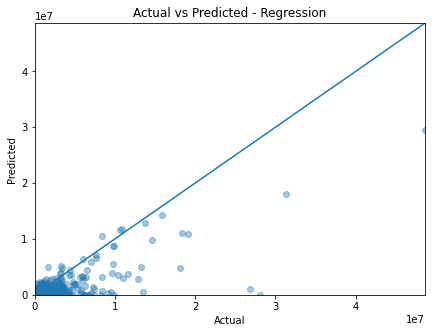

In [97]:
evaluate_model(feat_pipe, X_train_prepared, y_train_reg)

In [88]:
y_train_reg_log = np.log(y_train_reg+1)
y_test_reg_log = np.log(y_test_reg+1)

In [89]:
feat_pipe.fit(X_train_prepared, y_train_reg_log)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x12abf5280>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x12abf53a0>)),
                ('StandardScaler', StandardScaler()),
                ('SVD', TruncatedSVD(n_components=3)),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0

In [94]:
feat_pipe.predict(X_test_prepared)[0]

1.5966611

In [95]:
np.exp(1.5966611)

4.936522322561038

Cross Validation Scores:
[-4.14823349 -4.36679729 -4.51524007 -4.33918493 -4.20608128]
-------------------------------------------------------


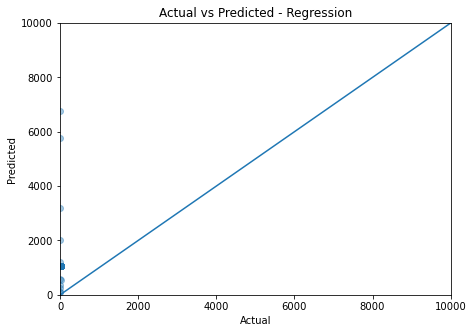

In [101]:
evaluate_model(feat_pipe, X_train, y_train_reg_log)

In [ ]:
evaluate_model(feat_pipe, X_test, y_test_reg_log)

[Back to Top](#Index)
# Feature Engineering

**What is feature engineering**?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

Feature engineering is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms. Unless we're working with the same data over and over again, this isn't something we can automate. It will require creativity and a good, thorough understanding of our data.

Regression results can change significantly depending on feature selection. Let's take a closer look at our features.

In [79]:
X_train_prepared.corr().style.background_gradient().set_precision(2)

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
no_of_sales_12M_1,1.00,0.49,0.49,0.37,0.44,0.40,0.38,0.36,0.32,0.29,0.32,0.29,0.32,0.22,0.16,0.19,0.28,-0.17,-0.24,0.22,0.10,0.08,0.09,0.01,0.08,0.00,0.01,0.21,0.13,0.01,-0.00,-0.00,0.15,0.07,-0.00,0.01
no_of_Redemption_12M_1,0.49,1.00,0.43,0.44,0.20,0.28,0.22,0.22,0.15,0.18,0.16,0.18,0.15,0.10,0.14,0.13,0.19,-0.14,-0.26,0.07,0.11,0.09,0.01,0.00,0.01,0.00,0.01,0.04,0.01,0.01,-0.00,-0.00,0.09,0.12,-0.00,0.00
no_of_sales_12M_10K,0.49,0.43,1.00,0.66,0.44,0.45,0.59,0.53,0.33,0.30,0.46,0.40,0.35,0.25,0.31,0.42,0.56,-0.36,-0.44,0.24,0.13,0.22,0.14,-0.00,0.07,0.01,0.01,0.26,0.01,0.01,0.00,0.01,0.30,0.12,0.00,0.01
no_of_Redemption_12M_10K,0.37,0.44,0.66,1.00,0.34,0.44,0.44,0.59,0.26,0.30,0.35,0.44,0.28,0.17,0.21,0.43,0.41,-0.35,-0.67,0.11,0.03,0.20,0.02,-0.00,0.05,0.01,0.03,0.14,0.02,0.04,0.00,0.01,0.19,0.11,-0.00,0.00
no_of_funds_sold_12M_1,0.44,0.20,0.44,0.34,1.00,0.78,0.78,0.60,0.82,0.64,0.68,0.53,0.70,0.52,0.17,0.19,0.29,-0.17,-0.23,0.69,0.05,0.10,0.09,0.00,0.05,0.02,0.04,0.29,0.24,0.03,0.02,0.01,0.15,0.08,0.01,0.01
no_of_funds_redeemed_12M_1,0.40,0.28,0.45,0.44,0.78,1.00,0.68,0.78,0.68,0.82,0.59,0.69,0.63,0.44,0.17,0.22,0.28,-0.20,-0.30,0.44,0.05,0.11,0.06,0.00,0.03,0.03,0.03,0.26,0.09,0.03,0.03,0.01,0.13,0.10,0.00,0.01
no_of_fund_sales_12M_10K,0.38,0.22,0.59,0.44,0.78,0.68,1.00,0.67,0.64,0.52,0.85,0.57,0.64,0.48,0.22,0.24,0.40,-0.23,-0.31,0.55,0.04,0.15,0.10,0.00,0.07,0.01,0.04,0.31,0.05,0.04,0.02,0.02,0.19,0.10,0.01,0.02
no_of_funds_Redemption_12M_10K,0.36,0.22,0.53,0.59,0.60,0.78,0.67,1.00,0.50,0.61,0.58,0.85,0.55,0.36,0.18,0.26,0.34,-0.25,-0.40,0.27,0.04,0.13,0.05,0.00,0.05,0.02,0.02,0.28,0.05,0.02,0.03,0.02,0.14,0.11,0.00,0.02
no_of_assetclass_sold_12M_1,0.32,0.15,0.33,0.26,0.82,0.68,0.64,0.50,1.00,0.74,0.74,0.55,0.61,0.58,0.13,0.11,0.21,-0.12,-0.18,0.55,0.05,0.10,0.09,0.01,0.07,0.03,0.05,0.07,0.14,0.04,0.03,0.02,0.11,0.07,0.02,0.01
no_of_assetclass_redeemed_12M_1,0.29,0.18,0.30,0.30,0.64,0.82,0.52,0.61,0.74,1.00,0.57,0.71,0.55,0.48,0.11,0.10,0.18,-0.12,-0.21,0.36,0.03,0.08,0.08,0.01,0.06,0.04,0.03,0.07,0.09,0.03,0.05,-0.00,0.09,0.06,-0.00,0.01


In [ ]:
X_train_prepared.hist(bins=40, figsize=(16,10));

[Back to Top](#Index)
## Variable Inflation Factor (VIF)

VIF measures the amount of multicollinearity in a set of multiple regressors, by evaluating how much the variance of the independent variable is inflated by it's interaction with other independent variables. VIF threshold of 5 to 10 are acceptable, but values above 10 are too high.  

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [103]:
funds = pd.concat([X_train_prepared, y_train_reg.to_frame()], axis=1)
features = funds.columns.tolist()
target = 'sales_12M_2019'

In [104]:
transformer = ReduceVIF()

X_tr_vif = transformer.fit_transform(X_train_prepared, y_train_reg)
X_tr_vif.head()

ReduceVIF fit
ReduceVIF transform


/Users/carletonsmith/miniconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping AUM with vif=inf
Dropping aum_AC_EQUITY with vif=inf
Dropping aum_AC_REAL_ESTATE with vif=12.883861985080268
Dropping no_of_funds_sold_12M_1 with vif=11.388600650383239
Dropping aum_P_MF with vif=10.507825557145479


,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
0,-0.131327,-0.100418,-0.210641,-0.198657,-0.626787,-0.430000,-0.441804,0.201462,-0.868033,-0.534630,-0.562039,-0.372488,0.065543,-0.083247,-0.154606,0.090417,0.156246,0.436844,-0.070601,-0.059801,-0.012455,-0.023802,-0.041821,-0.040002,-0.070366,-0.030628,-0.093547,-0.018485,-0.057933,-0.016559,-0.070033
1,0.064598,-0.068134,-0.210641,-0.087441,1.399401,-0.430000,0.296800,1.188127,1.034363,-0.534630,0.777535,3.177868,1.018590,-0.082219,-0.139641,0.090417,0.071676,3.848384,-0.166822,-0.059801,-0.012455,-0.023802,-0.041821,0.047651,1.121516,-0.030628,-0.093547,-0.018485,-0.158246,-0.016559,3.269629
2,-0.170512,-0.100418,-0.024389,-0.198657,-0.626787,0.320475,-0.441804,0.201462,-0.868033,0.857226,-0.562039,-0.049728,0.065543,-0.083366,0.354063,0.090417,0.156246,-0.416042,-0.081085,-0.059801,-0.012455,-0.689998,-0.041821,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,2.378954,-0.016559,-0.070033
3,0.211542,-0.035851,-0.117515,-0.087441,0.183688,0.320475,0.296800,0.201462,1.034363,0.857226,0.777535,-0.049728,0.065543,-0.083366,-0.077698,0.090417,-0.110813,-0.416042,-1.473199,-0.059801,-0.012455,-0.023802,-0.311608,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-2.348109,-0.016559,1.402720
4,-0.199901,-0.095806,-0.210641,-0.198657,-0.221549,-0.430000,-0.441804,-0.785202,0.083165,-0.534630,-0.562039,-0.695247,-0.887503,-0.083366,-0.154761,0.090417,0.151123,-0.416042,-0.097721,-0.059801,-0.012455,-0.023802,-0.041821,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.057933,-0.016559,-0.070033


[Back to Top](#Index)
# Residuals

In [107]:
y_test_preds = feat_pipe.predict(X_test_prepared)

In [109]:
# get residuals
residuals = y_test_preds - y_test_reg

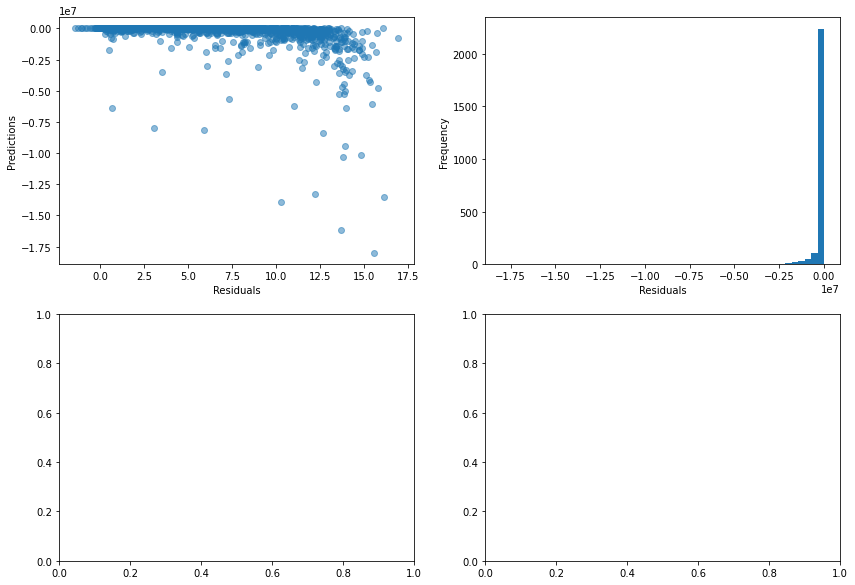

In [110]:
# plot predictions vs residuals
fig, axes = plt.subplots(2,2,figsize=(14,10))

# plot scatter on upper right plot
axes[0,0].scatter(x=y_test_preds, y=residuals, alpha=0.5)
axes[0,0].set(xlabel="Residuals",ylabel="Predictions");

# plot hist on upper left plot
axes[0,1].hist(residuals, bins=50)
axes[0,1].set(xlabel='Residuals', ylabel='Frequency');

In [ ]:
from statsmodels.api import qqplot

In [ ]:
axes[1,0].set_ylim([-3.5, 3.5])
axes[1,0].set_xlim([-3.5, 3.5])

In [ ]:
qqplot(residuals, fit=True, line='r', ax=axes[1,0])

[Back to Top](#Index)
# Classification

[Back to Top](#Index)
# Model Interpretation

# Scratch Work

[Back to Top](#Index)
## Condition number

Numerical analysis has a notion of condition number, which measures how sensitive a function is to changes in the input, and how much error in the output results from an error in the input. In linear regression this number can be used to diagnose multicollinearity. 

In [ ]:
from numpy import linalg as LA
from itertools import chain, combinations

# Find all possible combinations of any length more than 2
def all_subsets(set_arg):
    return chain(*map(lambda x: combinations(set_arg, x), range(2, len(set_arg)+1)))

funds = pd.concat([X_train_prepared, y_train_reg.to_frame()], axis=1)
features = funds.columns.tolist() 
target = 'sales_12M_2019'

cond_nums = {}
for subset in all_subsets(features):
    # checking that target varaible is included in the matrix
    if target not in list(subset):
        continue
    cond_nums[', '.join(list(subset))] = LA.cond(funds[list(subset)])
    
sorted(cond_nums.items(), key=lambda x:x[1])